In [10]:
from pyiron import Project
import pyiron_contrib
from elastic import ElasticMatrixJob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

In [3]:
pr = Project('scratch')
#pr.remove_jobs(recursive=True)

In [4]:
lammps = pr.create_job(pr.job_type.Lammps, 'hr')
lammps.structure = pr.create_ase_bulk('Cu', cubic=True).repeat(5)
lammps.structure[:3] = 'Ni'

In [5]:
lammps.list_potentials()

['FeCuNi_eam_alloy',
 '1985--Foiles-S-M--Ni-Cu--LAMMPS--ipr1',
 '2009--Bonny-G--Fe-Cu-Ni--LAMMPS--ipr1',
 '1985--Foiles-S-M--Ni-Cu--LAMMPS--ipr1',
 '2009--Bonny-G--Fe-Cu-Ni--LAMMPS--ipr1',
 '2013--Onat-B--Cu-Ni--LAMMPS--ipr2',
 '2018--Farkas-D--Fe-Ni-Cr-Co-Cu--LAMMPS--ipr1',
 '2013--Onat-B--Cu-Ni--LAMMPS--ipr1',
 '2018--Farkas-D--Fe-Ni-Cr-Co-Cu--LAMMPS--ipr2',
 '1989--Adams-J-B--Ag-Au-Cu-Ni-Pd-Pt--LAMMPS--ipr1',
 '1986--Foiles-S-M--Ag-Au-Cu-Ni-Pd-Pt--LAMMPS--ipr1',
 'EAM_Dynamo_BonnyPasianotCastin_2009_FeCuNi__MO_469343973171_005',
 'EAM_Dynamo_OnatDurukanoglu_2014_CuNi__MO_592013496703_005',
 'EMT_Asap_Standard_JacobsenStoltzeNorskov_1996_AlAgAuCuNiPdPt__MO_115316750986_001']

In [6]:
lammps.potential = lammps.list_potentials()[1]
lammps.potential

,Config,Filename,Model,Name,Species
170,"[pair_style eam\n, pair_coeff 1 1 Cu_smf7.eam\...",[NISTiprpy/1985--Foiles-S-M--Ni-Cu--LAMMPS--ip...,NISTiprpy,1985--Foiles-S-M--Ni-Cu--LAMMPS--ipr1,"[Cu, Ni]"
385,"[pair_style eam\n, pair_coeff 1 1 Cu_smf7.eam\...",[NISTiprpy/1985--Foiles-S-M--Ni-Cu--LAMMPS--ip...,NISTiprpy,1985--Foiles-S-M--Ni-Cu--LAMMPS--ipr1,"[Cu, Ni]"


In [7]:
sqs = pr.create_job(pr.job_type.SQSJob, 'sr')
sqs.input.iterations = 100
sqs.input.weights = None
sqs.input.n_output_structures = 2 

In [8]:
elastic = pr.create_job(ElasticMatrixJob, 'er')
elastic.input['num_of_points'] = 3
elastic.input['fit_order'] = 2
elastic.input['eps_range'] = 0.005
elastic.input['relax_atoms'] = False
elastic.input['sqrt_eta'] = False

In [9]:
sqs_elastic = pr.create_job(pr.job_type.SQSElasticConstants, 'single')
sqs_elastic.ref_ham = lammps
sqs_elastic.ref_sqs = sqs
sqs_elastic.ref_elastic = elastic
sqs_elastic.run()

2020-11-03 22:52:52,006 - pyiron_log - WARNING - The job single is being loaded instead of running. To re-run use the argument 'delete_existing_job=True in create_job'


In [10]:
sqs_elastic.output.elastic_matrices.sem

array([[1.40774359e-02, 2.55649855e-03, 1.73211000e-03, 1.48026116e-03,
        7.57595726e-03, 3.45691046e-03],
       [2.55649855e-03, 5.45840562e-05, 3.84007345e+01, 7.53139417e-03,
        1.46577565e-03, 1.55998336e-03],
       [1.73211000e-03, 3.84007345e+01, 1.40005185e-05, 7.53702599e-03,
        7.55910607e-03, 2.32398979e-03],
       [1.48026116e-03, 7.53139417e-03, 7.53702599e-03, 6.19363746e-05,
        4.82144751e-06, 1.99536109e-03],
       [7.57595726e-03, 1.46577565e-03, 7.55910607e-03, 4.82144751e-06,
        1.22834582e-06, 1.99305148e-03],
       [3.45691046e-03, 1.55998336e-03, 2.32398979e-03, 1.99536109e-03,
        1.99305148e-03, 1.69107762e-05]])

In [11]:
sqs_elastic_loaded = pr.load(sqs_elastic.job_name)

In [12]:
sqs_elastic_loaded.output.elastic_matrices.mean

array([[ 1.68900612e+02,  1.23595155e+02,  1.23596664e+02,
        -2.96052232e-03,  1.51519145e-02,  2.29060518e-02],
       [ 1.23595155e+02,  1.68872305e+02,  2.00401475e+02,
         1.50627883e-02, -2.93155130e-03,  3.29343380e-02],
       [ 1.23596664e+02,  2.00401475e+02,  1.68872168e+02,
         1.50740520e-02,  1.51182121e-02, -1.35957090e-03],
       [-2.96052232e-03,  1.50627883e-02,  1.50740520e-02,
         7.68189628e+01, -7.97102472e-03, -3.99072217e-03],
       [ 1.51519145e-02, -2.93155130e-03,  1.51182121e-02,
        -7.97102472e-03,  7.68189046e+01, -3.98610296e-03],
       [ 2.29060518e-02,  3.29343380e-02, -1.35957090e-03,
        -3.99072217e-03, -3.98610296e-03,  7.68189409e+01]])

In [13]:
sqs_elastic_loaded.output.residual_pressures

/opt/conda/lib/python3.8/site-packages/pyiron_base/generic/inputlist.py:287: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(self._store)


[array([[-2.14892552e-06, -1.35561960e-05, -2.45638657e-07],
       [-1.35561960e-05,  8.36779563e-06, -3.35861931e-06],
       [-2.45638657e-07, -3.35861931e-06, -5.30382949e-06]])
 array([[-8.48217229e-06, -6.53610757e-06,  6.53610757e-06],
       [-6.53610757e-06,  4.74977618e-06, -1.37995977e-06],
       [ 6.53610757e-06, -1.37995977e-06,  4.74977618e-06]])
 None None None]

In [14]:
sqs_elastic_ref = pr.create_job(pr.job_type.SQSElasticConstants, 'se')
sqs_elastic_ref.ref_ham = lammps
sqs_elastic_ref.ref_sqs = sqs
sqs_elastic_ref.ref_elastic = elastic

job = sqs_elastic_ref.create_job(pr.job_type.SQSElasticConstantsList, 'scan')
job.input.compositions = [
    {'Cu': 1., 'Ni': 0.},
    {'Cu': 0.95, 'Ni': 0.05},
    {'Cu': 0.90, 'Ni': 0.10},
    {'Cu': 0.85, 'Ni': 0.15},
    {'Cu': 0.80, 'Ni': 0.20},
    {'Cu': 0.70, 'Ni': 0.30},
    {'Cu': 0.60, 'Ni': 0.40},
    {'Cu': 0.50, 'Ni': 0.50},
    {'Cu': 0.40, 'Ni': 0.60},
    {'Cu': 0.30, 'Ni': 0.70},
    {'Cu': 0.20, 'Ni': 0.80},
    {'Cu': 0.10, 'Ni': 0.90},
    {'Cu': 0., 'Ni': 1.}
]
job.run()

/opt/conda/lib/python3.8/site-packages/pyiron_base/generic/inputlist.py:323: UserWarning: The input in InputList changed, while the state of the job was already finished.
  warnings.warn(
2020-11-03 22:53:17,670 - pyiron_log - WARNING - The job scan is being loaded instead of running. To re-run use the argument 'delete_existing_job=True in create_job'


In [15]:
loaded = pr.load(job.job_name)

<AxesSubplot:xlabel='Ni Atomic fraction', ylabel='Elastic constants (GPa)'>

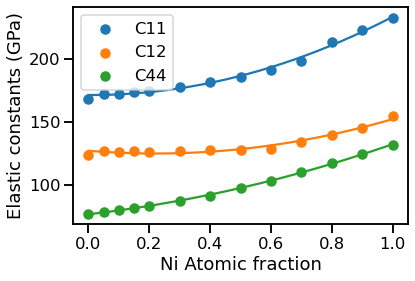

In [16]:
loaded.plot('Ni')

In [17]:
import os
cwd = os.getcwd()
print(cwd)
os.chdir(cwd)

/home/pyiron_user/pyiron/projects/from_liam/newComposition


In [18]:
concentrations=[0.2,0.6,1.0]

In [24]:
from damask import Geom
from damask import seeds
#import numpy as np
import subprocess,shlex
import os
import damask
from simulation_runner import simulation
simulation_folder =[]
job_file = []
grid = np.array([16,16,16])
size = np.array([1.0,1.0,1.0])
grains = 20
seeds = seeds.from_random(size,grains)
for i,c in enumerate(concentrations):
    os.chdir(cwd)
    simulation_folder.append('Ni-{}'.format(int(c*100)))
    os.system('mkdir {}'.format(simulation_folder[i]))
    os.system('cp Examples/material.yaml {}'.format(simulation_folder[i]))
    os.system('cp Examples/tensionX.load {}/tension_Ni{}.load'.format(simulation_folder[i],int(c*100)))
    path = cwd+'/'+simulation_folder[i];
    print(path)
    C11 = float(loaded.get_C11_poly('Ni')(c))
    C12 = float(loaded.get_C12_poly('Ni')(c))
    C44 = float(loaded.get_C44_poly('Ni')(c))
    print("moduli: {}, {}, {}".format(C11,C12,C44))
    print(simulation_folder[i])
    #os.chdir(simulation_folder[i])
    os.chdir(path)
#    os.system('rm *.hdf5')
    load = 'tension_Ni{}.load'.format(int(c*100))
    geom_name = 'test.geom'
    material_config = 'material.yaml'
    job_file.append('{}_{}.hdf5'.format(geom_name.split('.')[0],load.split('.')[0]))
    new_geom = Geom.from_Voronoi_tessellation(grid,size,seeds)
    new_geom.save_ASCII(geom_name)
    new_geom.save(geom_name.split('.')[0])
    C_matrix = [C11*1e9,C12*1e9,C44*1e9]
    elasticity={}
    elasticity.update({'type': 'hooke'})
    elastic_constants = {'C_11': C_matrix[0], 'C_12': C_matrix[1], 'C_44': C_matrix[2]}
    elasticity.update(elastic_constants)
    mat = damask.Config.load(material_config)
    mat['phase']['Aluminum']['elasticity'] = elasticity
    mat.save(material_config)
    simulation.run(simulation_folder[i],geom_name,load)
    print('simulation {} done'.format(str(i)))

/home/pyiron_user/pyiron/projects/from_liam/newComposition/Ni-20
moduli: 173.71850375345454, 124.98294717254554, 83.41454597757046
Ni-20
simulation 0 done
/home/pyiron_user/pyiron/projects/from_liam/newComposition/Ni-60
moduli: 193.5127538778634, 131.42867768811908, 103.4621448611117
Ni-60
simulation 1 done
/home/pyiron_user/pyiron/projects/from_liam/newComposition/Ni-100
moduli: 233.58918421892918, 152.31282855048707, 132.38982822960776
Ni-100
simulation 2 done


In [25]:
os.chdir(cwd)
import damask
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as PyPlot
import numpy as np
import h5py
#from Plot_stress_strain import plot
from damask_eval import eval_stress , eval_strain
%matplotlib inline
d = []
stresses = []
strains = []
#os.chdir(cwd)
for i,c in enumerate(concentrations):
    path = cwd+'/'+simulation_folder[i];
    os.chdir(path)
    #os.chdir(simulation_folder[i])
    d.append(damask.Result(job_file[i]))                  
    d[i].add_Cauchy()
    d[i].add_strain_tensor()
    d[i].add_Mises('sigma')
    d[i].add_Mises('epsilon_V^0.0(F)')
    d[i].add_calculation('avg_sigma',"np.average(#sigma_vM#)")
    d[i].add_calculation('avg_epsilon',"np.average(#epsilon_V^0.0(F)_vM#)")
    d[i].save_vtk(['sigma','epsilon_V^0.0(F)','sigma_vM','epsilon_V^0.0(F)_vM'])
    stresses.append(eval_stress(job_file[i]))
    strains.append(eval_strain(job_file[i]))

 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
/home/pyiron_user/pyiron/projects/from_liam/newComposition/damask_eval.py:19: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  hdf = h5py.File(d.fname)
/home/pyiron_user/pyiron/projects/from_liam/newComposition/da

Text(0.5, 1.0, 'Stress-Strain')

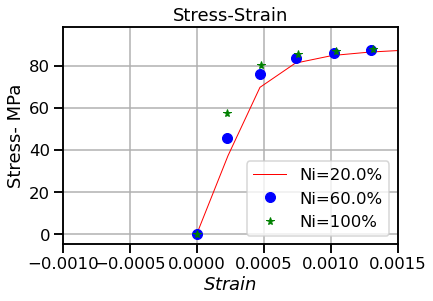

In [37]:
import matplotlib.pyplot as plt
i = 0;
#stresses[0]= eval_stress(job_file[0])
#stresses[1]= eval_stress(job_file[1])
#stresses[2]= eval_stress(job_file[2])
colors = ['r','g','b']
#for color, strain, stress, c in zip(colors, strains, stresses, concentrations):
plt.plot(strains[0], stresses[0], 'r', linewidth=1, label = 'Ni={}%'.format(0.2*100))
plt.plot(strains[1], stresses[1], 'b', linestyle="None",marker = 'o' ,markersize = 10,label = 'Ni={}%'.format(0.6*100))
plt.plot(strains[2], stresses[2], 'g', linestyle="None",marker = '*', markersize = 8 ,label = 'Ni={}%'.format(1*100))
plt.xlim(-0.001, 0.0015)
plt.grid(True)
plt.xlabel('$Strain$')
plt.ylabel('Stress- MPa')
plt.legend( loc='lower right')
plt.title("Stress-Strain")